# **ÁRBOLES**

***
### **REPRESENTACIÓN DE ÁRBOLES**
***

Para representar un árbol en Python podemos utilizar objetos. Cada nodo del árbol puede ser representado como un objeto cuyos atributos son el valor del nodo y un diccionario que contenga sus nodos hijos. Las keys del diccionario serán los valores de los nodos y los values serán la direcciones de memoria donde se encuentra el nodo que corresponde a la key.

In [ ]:
# Creamos la clase Nodo con dos atributos (valor e hijos) y un método (agregar_hijo).
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.hijos = {}

    def agregar_hijo(self, nodo):
        self.hijos[nodo.valor] = nodo

Si deseamos crear el árbol de la siguiente imagen debemos crear un objeto a partir de la clase Nodo.
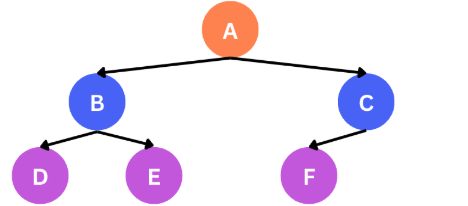

In [ ]:
# Creamos 6 objetos, uno para cada nodo, a partir de la clase Nodo
raiz = Nodo('A')
nodo_b = Nodo('B')
nodo_c = Nodo('C')
nodo_d = Nodo('D')
nodo_e = Nodo('E')
nodo_f = Nodo('F')

# Conectamos la raiz a sus dos hijos (B y C)
raiz.agregar_hijo(nodo_b)
raiz.agregar_hijo(nodo_c)

# Conectamos el nodo B a sus dos hijos (D y E)
nodo_b.agregar_hijo(nodo_d)
nodo_b.agregar_hijo(nodo_e)

# Conectamos el nodo C a su hijo (F)
nodo_c.agregar_hijo(nodo_f)

Podemos verificar si los hijos se añadieron correctamente explorando el atributo hijos de cada objeto:

In [ ]:
print(raiz.hijos)

{'B': <__main__.Nodo object at 0x7da1c1875290>, 'C': <__main__.Nodo object at 0x7da1c1875510>}


In [ ]:
print(nodo_b.hijos)

{'D': <__main__.Nodo object at 0x7da1c18755d0>, 'E': <__main__.Nodo object at 0x7da1c1875650>}


In [ ]:
print(nodo_c.hijos)

{'F': <__main__.Nodo object at 0x7da1c18756d0>}


Tal como vemos, al imprimir el atributo hijos de cada objeto obtenemos un diccionario con el valor y la dirección de memoria de los nodos hijos.

***
### **PROPIEDADES DE ÁRBOLES**
***



#### **Longitud de camino**

La longitud de un camino es el número de ramas o arcos que hay que transitar para llegar de un nodo a otro.

Incluyamos el método `buscar_camino` en la clase Nodo. El mismo se encargará de encontrar el camino desde un nodo hasta otro, siempre que sea posible.

In [ ]:
# Recreamos la clase nodo, esta vez incluyendo el método buscar_camino
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.hijos = {}

    def agregar_hijo(self, nodo):
        self.hijos[nodo.valor] = nodo


    def buscar_camino(self, destino, camino=None):
        # Inicializamos el camino solo una vez.
        if camino is None:
            camino = []

        # Agregamos el nodo actual al camino
        camino.append(self.valor)

        # Si el nodo actual es el mismo que el nodo destino, retornamos el camino
        if self.valor == destino:
            return camino

        # Recorrermos los hijos
        for hijo in self.hijos.values():
            # Buscamos de manera recursiva en cada hijo, pasando el camino como
            # una copia para no modificar la lista original
            camino_encontrado = hijo.buscar_camino(destino, camino[:])
            # Si encontramos el camino, lo retornamos
            if camino_encontrado:
                return camino_encontrado

        # Si no encontramos el destino, retornamos None
        return None

Una vez recreada la clase, esta vez incluyendo el método `buscar_camino`, podemos volver a crear el árbol.

In [ ]:
# Creamos el mismo árbol que antes, pero usando la nueva clase Nodo
raiz = Nodo('A')
nodo_b = Nodo('B')
nodo_c = Nodo('C')
nodo_d = Nodo('D')
nodo_e = Nodo('E')
nodo_f = Nodo('F')

raiz.agregar_hijo(nodo_b)
raiz.agregar_hijo(nodo_c)
nodo_b.agregar_hijo(nodo_d)
nodo_b.agregar_hijo(nodo_e)
nodo_c.agregar_hijo(nodo_f)

Finalmente, implementamos el método `buscar_camino` para probar su funcionamiento.

In [ ]:
# Buscamos el camino desde la raíz hasta el nodo D.
camino = raiz.buscar_camino('C')

print(camino)

['A', 'C']


In [ ]:
# Buscamos el camino desde el nodo F hasta la raíz.
camino = nodo_f.buscar_camino('A')

print(camino)

None


#### **Grado del árbol**

El grado de un nodo es el número de hijos que tiene dicho nodo. El grado de un árbol es el grado máximo de los nodos del árbol.

Incluyamos el método `calcular_grado_arbol` en la clase Nodo. El mismo se encargará de encontrar el grado del árbol construido. Para poder construirlo, necesitaremos previamente crear el método `calcular_grado_nodo` que se encargue de calcular el grado de cada nodo.

In [ ]:
# Recreamos la clase nodo, esta vez incluyendo el método calcular_grado_arbol

class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.hijos = {}

    def agregar_hijo(self, nodo):
        self.hijos[nodo.valor] = nodo

    def calcular_grado_nodo(self):
        # El grado del nodo es el número de hijos que tiene
        grado_nodo = len(self.hijos)
        return grado_nodo

    def calcular_grado_arbol(self):
        # El grado del árbol es el máximo grado entre todos los nodos
        grado_maximo = self.calcular_grado_nodo()

        # Revisamos recursivamente los grados de los hijos y nos quedamos con el máximo
        for hijo in self.hijos.values():
            grado_maximo = max(grado_maximo, hijo.calcular_grado_arbol())
        return grado_maximo

Una vez recreada la clase, esta vez incluyendo el método `calcular_grado_arbol`, podemos volver a crear el árbol.

In [ ]:
# Creamos el mismo árbol que antes, pero usando la nueva clase Nodo
raiz = Nodo('A')
nodo_b = Nodo('B')
nodo_c = Nodo('C')
nodo_d = Nodo('D')
nodo_e = Nodo('E')
nodo_f = Nodo('F')

raiz.agregar_hijo(nodo_b)
raiz.agregar_hijo(nodo_c)
nodo_b.agregar_hijo(nodo_d)
nodo_b.agregar_hijo(nodo_e)
nodo_c.agregar_hijo(nodo_f)

Finalmente, implementamos el método `calcular_grado_arbol` para probar su funcionamiento.

In [ ]:
# Calculamos el grado del árbol
grado = raiz.calcular_grado_arbol()

print(f"El grado del árbol es: {grado}")

El grado del árbol es: 2


#### **Peso del árbol**

El peso de un árbol es el número total de nodos que tiene el mismo.


Incluyamos el método `calcular_peso_arbol` en la clase Nodo. El mismo se encargará de encontrar el peso del árbol construido.

In [ ]:
# Recreamos la clase nodo, esta vez incluyendo el método calcular_grado_arbol

class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.hijos = {}

    def agregar_hijo(self, nodo):
        self.hijos[nodo.valor] = nodo

    def calcular_peso_arbol(self):
        # Comenzamos contando el nodo actual
        cantidad = 1

        # Recursivamente contamos los nodos de los hijos
        for hijo in self.hijos.values():
            cantidad += hijo.calcular_peso_arbol()

        return cantidad

Una vez recreada la clase, esta vez incluyendo el método `calcular_peso_arbol`, podemos volver a crear el árbol.

In [ ]:
# Creamos el mismo árbol que antes, pero usando la nueva clase Nodo
raiz = Nodo('A')
nodo_b = Nodo('B')
nodo_c = Nodo('C')
nodo_d = Nodo('D')
nodo_e = Nodo('E')
nodo_f = Nodo('F')

raiz.agregar_hijo(nodo_b)
raiz.agregar_hijo(nodo_c)
nodo_b.agregar_hijo(nodo_d)
nodo_b.agregar_hijo(nodo_e)
nodo_c.agregar_hijo(nodo_f)

Finalmente, implementamos el método `calcular_peso_arbol` para probar su funcionamiento.

In [ ]:
# Calcular la cantidad de nodos en el árbol
peso = raiz.calcular_peso_arbol()

print(f"El peso del árbol es igual a {peso}.")

El peso del árbol es igual a 6.


***
### **ÁRBOLES DE BÚSQUEDA**
***


#### **Construir el árbol**

Crearemos primero una clase Nodo que tendrá 3 atributos: cuál es su valor, quién es su hijo izquierdo y quién es su hijo derecho. Luego crearemos la clase ArbolBusquedaBinario que contenga métodos para ir insertando los nodos.
A diferencia de lo visto anteriormente en un árbol binario de búsqueda no podemos designar manualmente hijos a un nodo, sino que únicamente podemos declarar quiénes son los nodos que formarán parte del árbol y éstos se ordenarán de acuerdo a las dos reglas que definen un árbol binario de búsqueda:
* Los valores de todos los nodos en su subárbol izquierdo son menores que el valor del nodo.
* Los valores de todos los nodos en su subárbol derecho son mayores que el valor del nodo.

La clase ArbolBusquedaBinario contará con el método `imprimir_arbol` para poder obtener una representación visual del árbol y el método `insertar` para poder insertar nodos y así ir construyendo el árbol.

In [ ]:
# Creamos la clase Nodo
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierda = None
        self.derecha = None

# Creamos la clase ArbolBusquedaBinario
class ArbolBusquedaBinario:
    def __init__(self):
        self.raiz = None

    def imprimir_arbol(self):
        if self.raiz is None:
            print("El árbol está vacío.")
        else:
            self._imprimir_arbol(self.raiz, "", True)

    def _imprimir_arbol(self, nodo, espacio, es_izquierda):
        if nodo is None:
            return
        self._imprimir_arbol(nodo.derecha, espacio + "   ", False)
        print(espacio + ("└── " if es_izquierda else "├── ") + str(nodo.valor))
        self._imprimir_arbol(nodo.izquierda, espacio + "   ", True)


    def insertar(self, valor):
        # Si la raiz está vacía, colocamos el valor proporcionado como raíz
        if self.raiz is None:
            self.raiz = Nodo(valor)
        # En otro caso, llamamos al método _insertar para insertar el valor
        # en la posición que corresponda
        else:
            self._insertar(self.raiz, valor)


    def _insertar(self, nodo, valor):
        # Si el valor ingresado es menor que el nodo ya presente en el árbol
        if valor < nodo.valor:
            # Si el nodo de la izquierda está vacío, colocamos el valor proporcionado en la izquierda
            if nodo.izquierda is None:
                nodo.izquierda = Nodo(valor)
            # En otro caso, seguimos bajando recursivamente por el árbol hasta insertarlo como hijo
            # izquierdo de algún nodo existente
            else:
                self._insertar(nodo.izquierda, valor)

        # Si el valor ingresado es mayor que el nodo ya presente en el árbol
        elif valor > nodo.valor:
            # Si el nodo de la derecha está vacío, colocamos el valor proporcionado en la derecha
            if nodo.derecha is None:
                nodo.derecha = Nodo(valor)
            # En otro caso, seguimos bajando recursivamente por el árbol hasta insertarlo como hijo
            # derecho de algún nodo existente
            else:
                self._insertar(nodo.derecha, valor)

Una vez creada la clase `ArbolBusquedaBinario` podemos instanciar un objeto de la misma e insertar tantos nodos como necesitemos. Los mismos se irán insertando respetando el orden de los árboles de búsqueda binarios.

In [ ]:
arbol = ArbolBusquedaBinario()
arbol.insertar(50)
arbol.insertar(30)
arbol.insertar(20)
arbol.insertar(40)
arbol.insertar(70)
arbol.insertar(60)
arbol.insertar(80)

arbol.imprimir_arbol()

      ├── 80
   ├── 70
      └── 60
└── 50
      ├── 40
   └── 30
      └── 20
